In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
# from sklearn_pandas as skpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**The following dataset contain the IMDb rating and votes information for titles**

In [ ]:
rating = pd.read_csv('/content/drive/MyDrive/title.ratings.tsv/data.tsv', sep='\t')

In [ ]:
rating

,tconst,averageRating,numVotes
0,tt0000001,5.7,1834
1,tt0000002,6.0,236
2,tt0000003,6.5,1593
3,tt0000004,6.0,153
4,tt0000005,6.2,2410
...,...,...,...
1201143,tt9916682,5.6,5
1201144,tt9916690,6.6,5
1201145,tt9916720,5.2,147
1201146,tt9916766,7.1,17


**The following dataset contains the following information for titles. It contains a critical imformation that we requires that is genres**:

In [ ]:
genre=pd.read_csv('/content/drive/MyDrive/title.basics.tsv/data.tsv', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
genre

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8411465,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8411466,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8411467,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8411468,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


We merged both the dataset in order to have a combine dataset which contains critical datas we need for the ML model
we used the following paraeter in order to build the model:


*   Genres(Thriller,Horror,etc)
*   The total runtime of the title
*   Number of Votes
*   The Average Rating of the movie
*   Whether the movie is R rated or not









In [ ]:
df_cd = pd.merge(rating, genre, how='inner', on = 'tconst')

In [ ]:
df_cd = df_cd[df_cd['genres'].notnull()]
df_cd =df_cd.reset_index()
df_cd 

,index,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,0,tt0000001,5.7,1834,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,1,tt0000002,6.0,236,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,2,tt0000003,6.5,1593,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,3,tt0000004,6.0,153,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,4,tt0000005,6.2,2410,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...,...
1201140,1201142,tt9916682,5.6,5,tvEpisode,Horrid Henry It's all Your Fault,Horrid Henry It's all Your Fault,0,2012,\N,10,"Adventure,Animation,Comedy"
1201141,1201143,tt9916690,6.6,5,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,10,"Adventure,Animation,Comedy"
1201142,1201144,tt9916720,5.2,147,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery"
1201143,1201145,tt9916766,7.1,17,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV"


**Data Cleaning**

In [ ]:
arr = []
j =0
s1={}

for s in df_cd['genres']:
  a= s.split(',')
  
  for i in a:
    s1[i]=1;
  arr.append(s.split(','))
  # df=df_cd
# df=pd.DataFrame(index=range(len(df_cd)));
#for s in s1:
  # df=df_cd
# df=pd.DataFrame(index=range(len(df_cd)));
for s in s1:
  df_cd[s]=0;
for s in df_cd['genres']:
  a= s.split(',')
  for i in a:
    df_cd[i][j]+=1
  j=j+1
df_cd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Documentary,Short,Animation,Comedy,Romance,Sport,News,Drama,Fantasy,Horror,Biography,Music,War,Crime,Western,Family,Adventure,Action,History,Mystery,\N,Sci-Fi,Musical,Thriller,Film-Noir,Game-Show,Talk-Show,Reality-TV,Adult
0,0,tt0000001,5.7,1834,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,tt0000002,6.0,236,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,tt0000003,6.5,1593,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,tt0000004,6.0,153,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,tt0000005,6.2,2410,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201140,1201142,tt9916682,5.6,5,tvEpisode,Horrid Henry It's all Your Fault,Horrid Henry It's all Your Fault,0,2012,\N,10,"Adventure,Animation,Comedy",0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1201141,1201143,tt9916690,6.6,5,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,10,"Adventure,Animation,Comedy",0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1201142,1201144,tt9916720,5.2,147,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery",0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1201143,1201145,tt9916766,7.1,17,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
l = {}
k = {}
m = {}
from collections import defaultdict
# df=pd.DataFrame();
d={}
j=0
d=defaultdict(list)
e=defaultdict(list)
for s in df_cd['genres']:
  a= s.split(',') 
  for i in a:
    l[i]=0
    k[i]=0
    m[i]=0

for s in df_cd['genres']:
  a= s.split(',')
  for i in a:
    #l[i]+=1
    # df.loc[len(df.index)] = [i,df_cd['averageRating'][j]]
    # df.append({i:df_cd['averageRating'][j]},ignore_index = True)
    d[i].append(df_cd['averageRating'][j])
    e[i].append(df_cd['numVotes'][j])
    l[i]=(l[i]*k[i]+df_cd['averageRating'][j])/(k[i]+1)
    k[i]+=1
    m[i]+=df_cd['numVotes'][j]
  j+=1


In [ ]:
Ab = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
Eb = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in e.items() ]))

**Bar Chart of Movie Rating Vs Genres**

**Inference we got from the data**
*   The movie rating doesn't drastically change with the genres in most cases.
*   The average rating  for all genres varies from 6-7.5 which tell central mean of rating for each genres in same
*   However there are some obious differences. Horror genres is genrerally low rated which means most people don't rate horror genres high in online forum
*   While in case of historically genre is higher rated which means people enoy them.



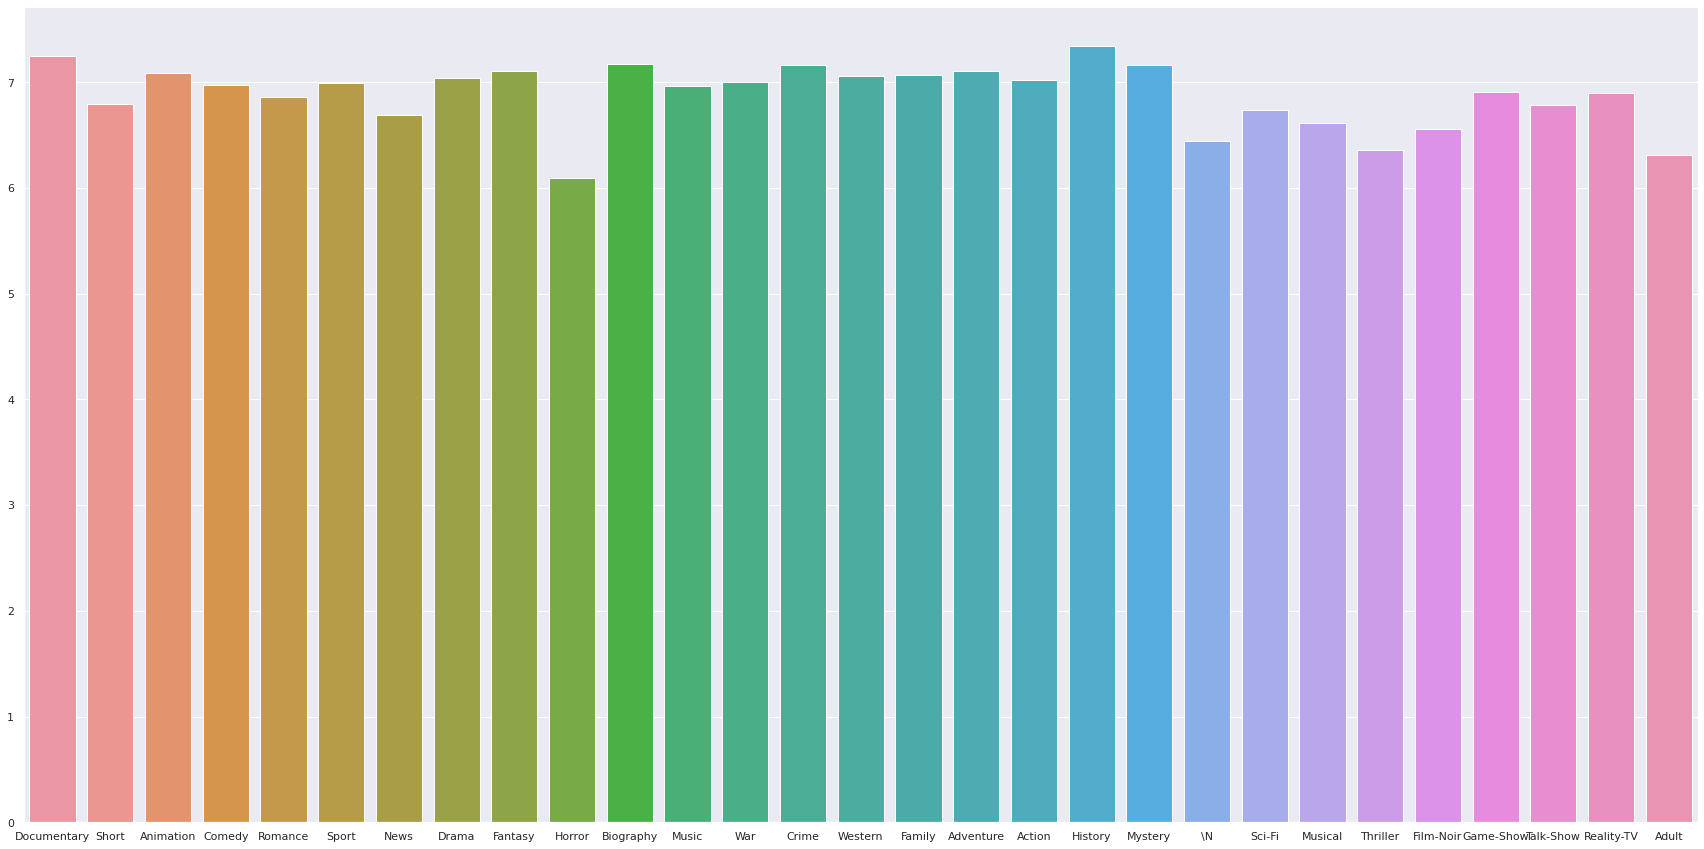

In [ ]:
plt.bar(*zip(*l.items()))
#plt.show()
sns.barplot(data=pd.DataFrame.from_records([l]))
sns.set(rc = {'figure.figsize':(30,15)})

**Bar Chart of Number of Votes Vs Genres**

**Inference we got from the data**


*   The drama genres is most highly viewed . Probably as most of the titles fall under this category of genre
*   In the opposite end of the spectrum we have news , short and history which are some of the least visited genre currently
*   Although we have seen history being the highest rated tv show earlier but we also found they are some of the least popular title around.
*   The genres which people seems to enjoy are comedy and triller . So just by looking into the dataset we can claim that a title which contains elements of thriller,comedy and drama has sufficient potiential to be hit TV show


---



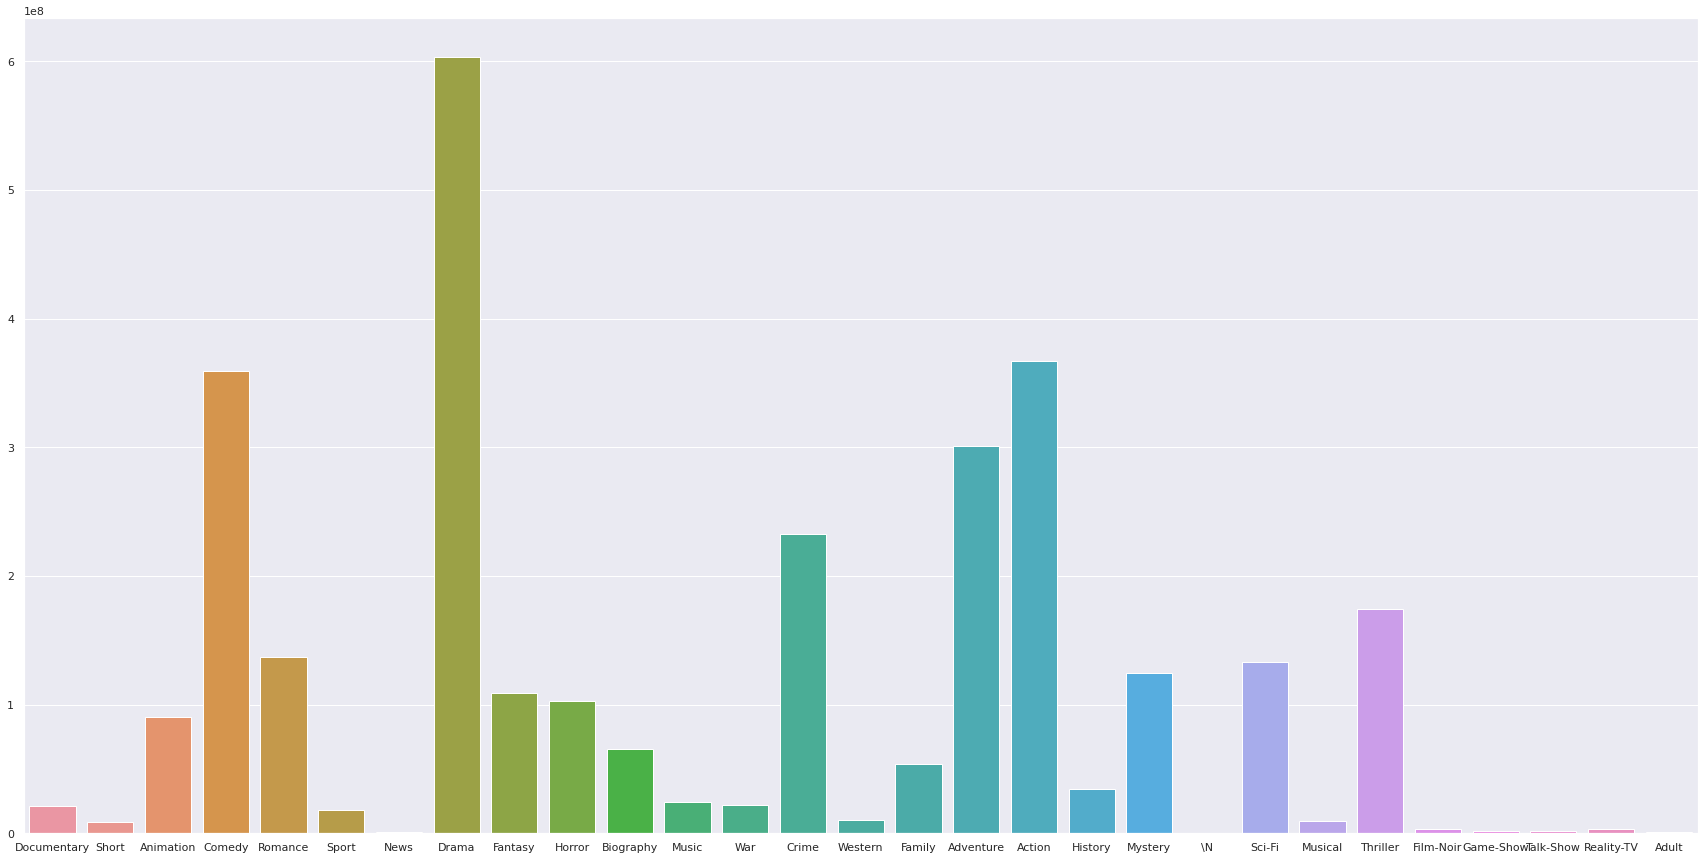

In [ ]:
sns.barplot(data=pd.DataFrame.from_records([m]))
sns.set(rc = {'figure.figsize':(30,15)})
plt.savefig('save_as_a_png.png')

**Box Plot of Rating Vs Genres**
**Inference we got from the data**


*   Box plot is really critical in this case as it gives intution about how the datas are varying 
*   We can see horror is one of the least rated genres. Moreover it also has a higher standard deviation.
*   We also noticed that in general cases the distrubution of rating don't vary that much with genres.
*   By using the above conclusion we can say genres doesn't affect the rating to that extend.



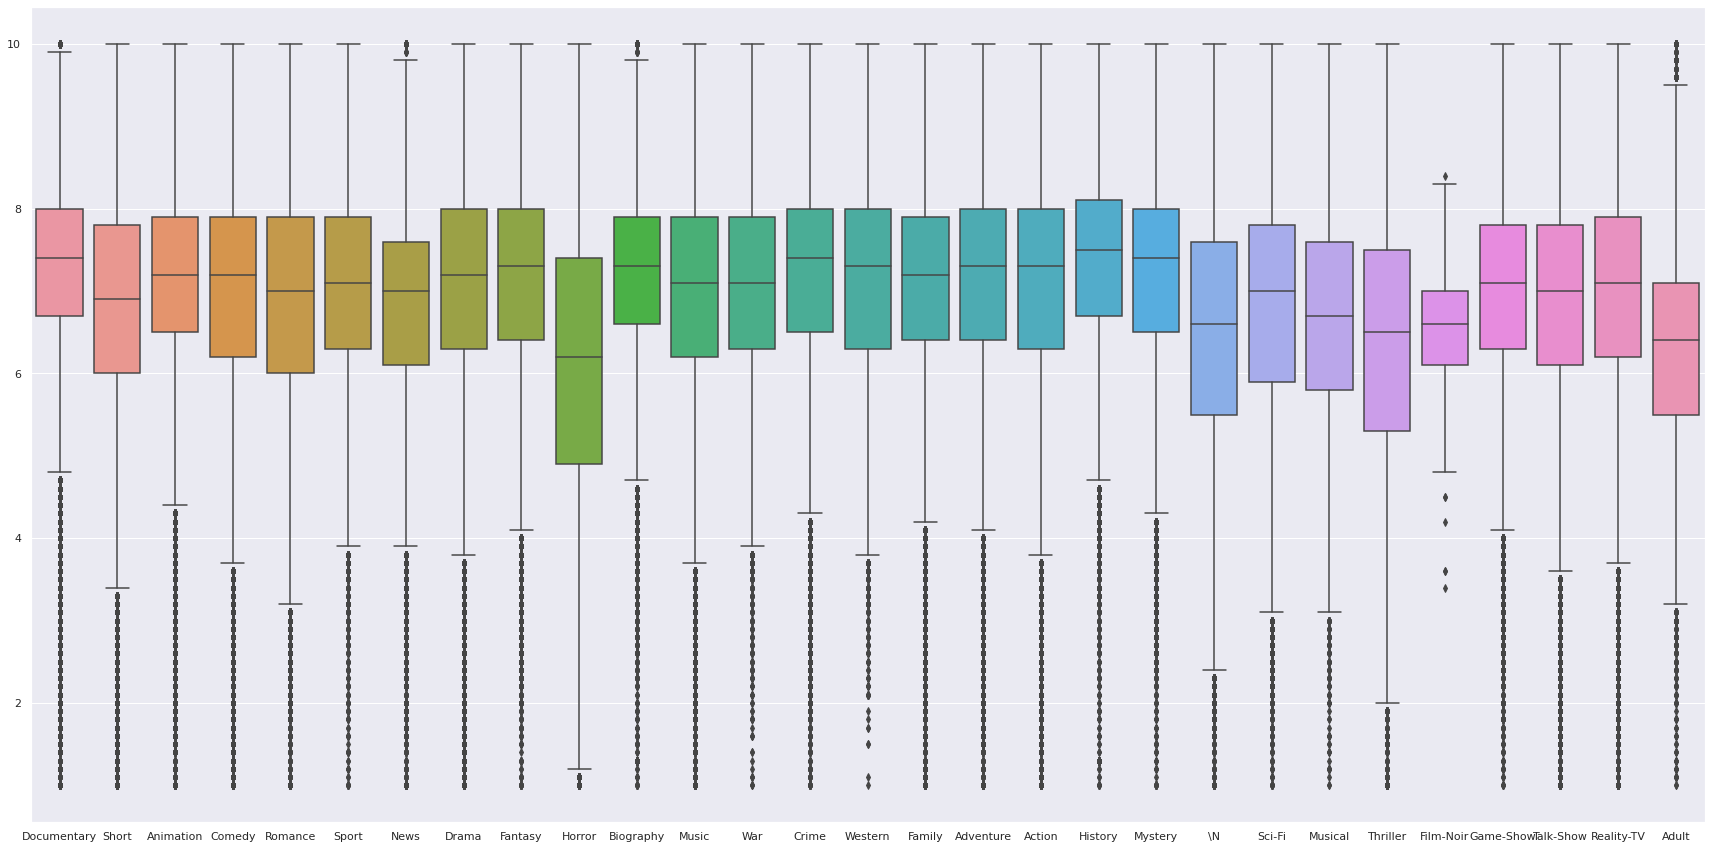

In [ ]:
sns.boxplot(data=Ab)
sns.set(rc = {'figure.figsize':(30,15)})
plt.savefig('save_as_a_png.png')

In [ ]:
from sklearn.model_selection import train_test_split
X = df_cd.iloc[:, 12:40].values
y = df_cd.iloc[:, 2].values

In [ ]:
X

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([5.7, 6. , 6.5, ..., 5.2, 7.1, 7.4])

**Decision Tree**                                                                            
We used decison tree as our preferred ML model for our project 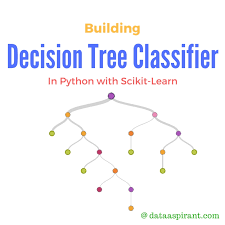

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
Y = df_cd.iloc[:, 3].values

In [ ]:
Y

array([1834,  236, 1593, ...,  147,   17,   32])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor(random_state = 0)
regressor1.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(regressor1, X, Y, scoring="neg_root_mean_squared_error", cv = 7))

[-27626.28577293 -18393.47395721 -14467.12137611 -14074.21827986
 -14592.08664875  -9575.32558774  -6714.42498739]


In [ ]:
mean_score = cross_val_score(regressor1, X, Y, scoring="neg_root_mean_squared_error", cv = 7).mean()
std_score = cross_val_score(regressor1, X, Y, scoring="neg_root_mean_squared_error", cv = 7).std()

**Expected number of views with genre Drama, Action and Comedy**

In [ ]:
l=[]
for x in s1:
  if(len(x)<=2):
    continue
  if x=='Drama' or x=='Action' or x=='Comedy':
    l.append(1)
  else:
    l.append(0)
regressor1.predict(np.array([l]))

array([1418.31647635])

**Expected number of views with genre News or Sport**

In [ ]:
l=[]
for x in s1:
  if(len(x)<=2):
    continue
  if x=='News' or x=='Sport':
    l.append(1)
  else:
    l.append(0)
regressor1.predict(np.array([l]))

array([103.34146341])